In [1]:
import os
import cv2
import numpy as np
import math
import time
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# %matplotlib notebook
from scipy import interpolate
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import gridplot
from bokeh.models import ColorBar, LinearColorMapper, BasicTicker

In [2]:
from rawFLIR_polarization_data_extraction import *

In [3]:
NUM_IMAGES=1
filename = "glass2_test_40Deg_lightHeadon_cloth.tiff"
file_location = "../FLIR_Camera"

image_data shape is :  (2048, 2448)
Quad algorithm time  0.0 s
im90 shape is :  (1024, 1224)
Stokes time:  0.05196857452392578 s
DoLP time:  0.034980058670043945 s


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:108: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:109: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


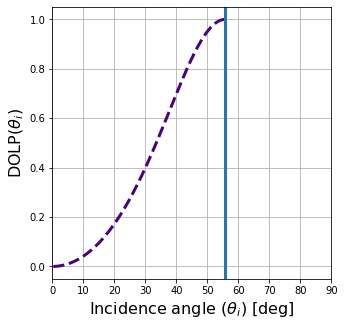

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.91292381286621 seconds
False
AoLP time:  0.0559689998626709 s


In [4]:
for i in range(NUM_IMAGES):
    image_data = cv2.imread(os.path.join(file_location, filename).format(i))[:,:,0]
    print("image_data shape is : ", image_data.shape)
#     print(not (image_data[:,:,0]==image_data[:,:,2]).all())
    im90, im45, im135, im0 = quad_algo(image_data)
    print("im90 shape is : ", im90.shape)
    
    write_quad_image(im90, 90, file_location, filename[:-5])
    write_quad_image(im90, 45, file_location, filename[:-5])
    write_quad_image(im90, 135, file_location, filename[:-5])
    write_quad_image(im90, 0, file_location, filename[:-5])
    
    # Get Stokes vector first 3 components from 4 quad images
    im_stokes0, im_stokes1, im_stokes2 = calculate_Stokes_Params(im90, im45, im135, im0)
    
    # Get DOLP from Stokes measurements
    im_DOLP = calculate_DOLP(im_stokes0, im_stokes1, im_stokes2)
    
    # Get theta (Angle of incidence) from DOLP
    im_theta1, DOLP_errors =  DOLP2Theta(1, 1.47, im_DOLP)
    print(np.array(DOLP_errors).any())
    
    # Create a heatmap from the greyscale image
    im_DOLP_normalized = normalise_DOLP(im_DOLP)    
    im_DOLP_heatmap = heatmap_from_greyscale(im_DOLP_normalized)
    write_image("DOLP_heatmap", i, im_DOLP_heatmap, file_location, filename[:-5])
    
    # Get AOLP from Stokes measurements
    im_AOLP = calculate_AOLP(im_stokes1, im_stokes2)
    
    # Get angle of plane of polarization from AOLP
    im_phi1 = (im_AOLP + np.pi/2)*180/np.pi;
    
    # Create a heatmap from the greyscale image
    im_AOLP_normalized = normalise_AOLP(im_AOLP)    
    im_AOLP_heatmap = heatmap_from_greyscale(im_AOLP_normalized)
    write_image("AOLP_heatmap", i, im_AOLP_heatmap, file_location, filename[:-5])    

image_data shape is :  (2048, 2448)
Quad algorithm time  0.0 s
im90 shape is :  (1024, 1224)
Stokes time:  0.045974016189575195 s
DoLP time:  0.0359797477722168 s


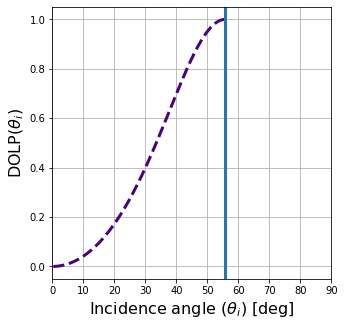

Time for DOLP2Theta conversion is :  23.09383988380432 seconds
False
AoLP time:  0.06296420097351074 s


In [5]:
NUM_IMAGES=1
filename = "glass2_test_40Deg_lightOblique_cloth.tiff"
file_location = "../FLIR_Camera"

for i in range(NUM_IMAGES):
    image_data = cv2.imread(os.path.join(file_location, filename).format(i))[:,:,0]
    print("image_data shape is : ", image_data.shape)
#     print(not (image_data[:,:,0]==image_data[:,:,2]).all())
    im90, im45, im135, im0 = quad_algo(image_data)
    print("im90 shape is : ", im90.shape)
    
    write_quad_image(im90, 90, file_location, filename[:-5])
    write_quad_image(im90, 45, file_location, filename[:-5])
    write_quad_image(im90, 135, file_location, filename[:-5])
    write_quad_image(im90, 0, file_location, filename[:-5])
    
    # Get Stokes vector first 3 components from 4 quad images
    im_stokes0, im_stokes1, im_stokes2 = calculate_Stokes_Params(im90, im45, im135, im0)
    
    # Get DOLP from Stokes measurements
    im_DOLP = calculate_DOLP(im_stokes0, im_stokes1, im_stokes2)
    
    # Get theta (Angle of incidence) from DOLP
    im_theta2, DOLP_errors =  DOLP2Theta(1, 1.47, im_DOLP)
    print(np.array(DOLP_errors).any())
    
    # Create a heatmap from the greyscale image
    im_DOLP_normalized = normalise_DOLP(im_DOLP)    
    im_DOLP_heatmap = heatmap_from_greyscale(im_DOLP_normalized)
    write_image("DOLP_heatmap", i, im_DOLP_heatmap, file_location, filename[:-5])
    
    # Get AOLP from Stokes measurements
    im_AOLP = calculate_AOLP(im_stokes1, im_stokes2)
    
    # Get angle of plane of polarization from AOLP
    im_phi2 = (im_AOLP + np.pi/2)*180/np.pi;
    
    # Create a heatmap from the greyscale image
    im_AOLP_normalized = normalise_AOLP(im_AOLP)    
    im_AOLP_heatmap = heatmap_from_greyscale(im_AOLP_normalized)
    write_image("AOLP_heatmap", i, im_AOLP_heatmap, file_location, filename[:-5])  

In [6]:
theta_lower_bound = min(np.min(im_theta1), np.min(im_theta2))
theta_upper_bound = max(np.max(im_theta1), np.max(im_theta2))
phi_lower_bound = min(np.min(im_phi1), np.min(im_phi2))
phi_upper_bound = max(np.max(im_phi1), np.max(im_phi2))

In [7]:
p1 = makeBokehColorbarImage(data=np.round(im_theta1,decimals=0), 
                            lower=theta_lower_bound, higher=theta_upper_bound, 
                            palette = "Viridis256", 
                            title='Head-on : θ')
p2 = makeBokehColorbarImage(data=np.round(im_phi1,decimals=0), 
                            lower=phi_lower_bound, higher=phi_upper_bound , 
                            palette = "Magma256", 
                            title='Head-on : ϕ')

In [8]:
p3 = makeBokehColorbarImage(data=np.round(im_theta2,decimals=0),
                            lower=theta_lower_bound, higher=theta_upper_bound, 
                            palette = "Viridis256", 
                            title='Oblique : θ')
p4 = makeBokehColorbarImage(data=np.round(im_phi2,decimals=0),
                            lower=phi_lower_bound, higher=phi_upper_bound , 
                            palette = "Magma256", 
                            title='Oblique : ϕ')

In [9]:
# make a grid
try:
    del grid
except NameError:
    pass
grid = gridplot([p1, p2, p3, p4], ncols=2, plot_width = 500, plot_height = 300)
# show(grid)

In [10]:
output_file(os.path.join(file_location,"glass_test_40Deg_Oblique_HeadOn_cloth.html"), title='incident light test')

In [11]:
show(grid)

- **Changing AO projection plane for changing illumination orientation:** When light is headon in line with the camera, the angle of plane of polarization is what is expected -- ~ 90 degrees. On the other hand if the light illuminating the surface is oblique, then the angle is different, about 80 degrees for the chosen oblique orientation of the lamp. 
- **Constant AOI with changing orientation:** But the Angle of incidence if found to be near constant 32-35 degrees for oblique and headon illumination. Value does not make a whole lot of sense as the incidence angle is fixed to be 40 degrees. But the constancy idea makes sense. Calibration can be done to check what orientation the computer is seeing